In [1]:
# Import Libraries

import numpy as np
import pandas as pd

In [2]:
dataset= pd.read_csv('C:\\Users\\91799\\OneDrive\\Desktop\\Spam.csv',encoding='latin-1')

In [3]:
dataset

,ï»¿v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
dataset = dataset.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
dataset.columns = ["label", "message"]

In [5]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
dataset['label']=dataset['label'].map({'ham':0,'spam':1})
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

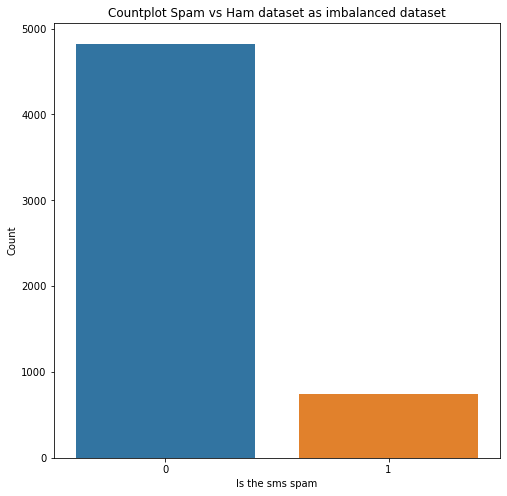

In [10]:
# countplot Spam vs Ham dataset as imbalanced dataset
plt.figure(figsize=(8,8))
g=sns.countplot(x='label',data=dataset)
p=plt.title('Countplot Spam vs Ham dataset as imbalanced dataset')
p=plt.xlabel('Is the sms spam')
p=plt.ylabel('Count')

In [11]:
# Handling imbalanced dataset using Oversampling
only_spam=dataset[dataset['label']==1]
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
print('No of Spam sms:',len(only_spam))
print('No of Ham:',len(dataset)-len(only_spam))

No of Spam sms: 747
No of Ham: 4825


In [13]:
count=int((dataset.shape[0]- only_spam.shape[0])/ only_spam.shape[0])
count

6

In [14]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])
dataset.shape

(9307, 2)

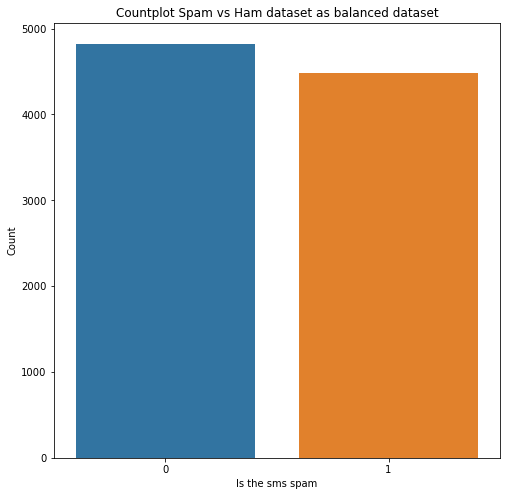

In [15]:
# countplot Spam vs Ham dataset as balanced dataset
plt.figure(figsize=(8,8))
g=sns.countplot(x='label',data=dataset)
p=plt.title('Countplot Spam vs Ham dataset as balanced dataset')
p=plt.xlabel('Is the sms spam')
p=plt.ylabel('Count')

In [16]:
# creating new feature word_count
dataset['word_count']=dataset['message'].apply(lambda x: len(x.split()))
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


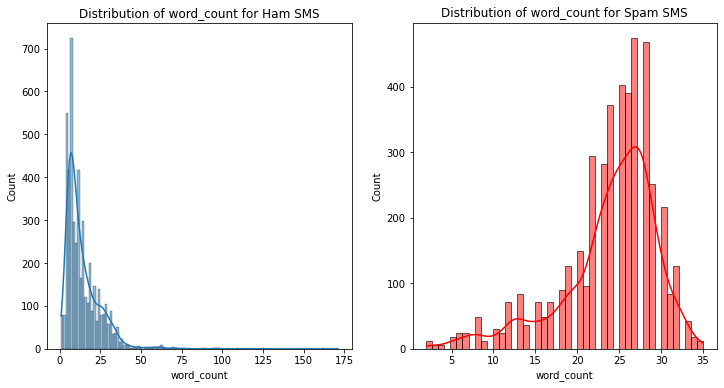

In [17]:
plt.figure(figsize=(12,6))

#(1,1)
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset['label']==0].word_count, kde=True)
p=plt.title('Distribution of word_count for Ham SMS')

#(1,2)
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset['label']==1].word_count, color='red',kde=True)
p=plt.title('Distribution of word_count for Spam SMS')

plt.tight_layout
plt.show()

In [18]:
# creating new features of containing currency_symbols
def currency(data):
    currency_symbols=['€','$','¥','£','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [19]:
dataset['contains_currency_symbols']=dataset['message'].apply(currency)
dataset

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


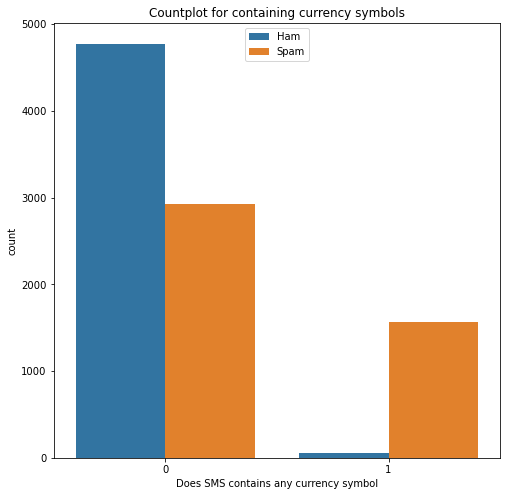

In [20]:
# countplot for contain_currency_symbols
plt.figure(figsize=(8,8))
g=sns.countplot(x='contains_currency_symbols',data=dataset, hue='label')
p=plt.title('Countplot for containing currency symbols')
p=plt.xlabel('Does SMS contains any currency symbol')
p=plt.ylabel('count')
p=plt.legend(labels=['Ham','Spam'], loc=9)

In [21]:
# creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<= 57:
            return 1
    return 0

In [22]:
dataset['contains_number']=dataset['message'].apply(number)
dataset

,label,message,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


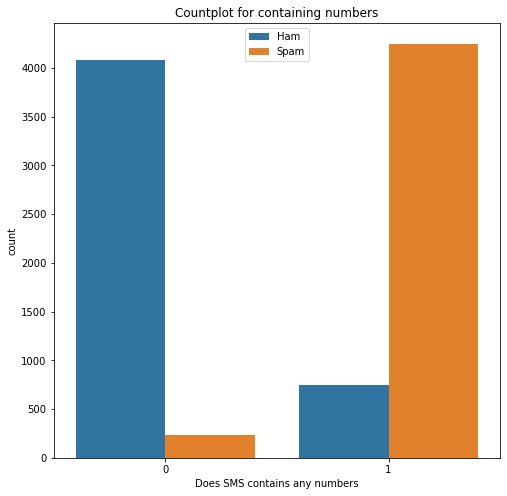

In [23]:
# counting foe containing numbers
plt.figure(figsize=(8,8))
g=sns.countplot(x='contains_number',data=dataset, hue='label')
p=plt.title('Countplot for containing numbers')
p=plt.xlabel('Does SMS contains any numbers')
p=plt.ylabel('count')
p=plt.legend(labels=['Ham','Spam'], loc=9)

In [24]:
# Data cleaning 
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91799\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91799\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91799\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
corpus=[]
wnl=WordNetLemmatizer()

for sms in list(dataset.message):
    message=re.sub(pattern='[^a-zA-Z]', repl=' ',string=sms) # filtering out special characters and numbers
    message=message.lower()
    words=message.split() # Tokenizer
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lemm_words)
    corpus.append(message)

In [26]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [27]:
# creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
x=pd.DataFrame(vectors, columns=feature_names)
y=dataset['label']

In [29]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Navie bayes model
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()
cv=cross_val_score(mnb,x,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.944
0.004


In [32]:
mnb.fit(x_train,y_train)
y_pred= mnb.predict(x_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [34]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[908,  50],
       [ 57, 847]], dtype=int64)

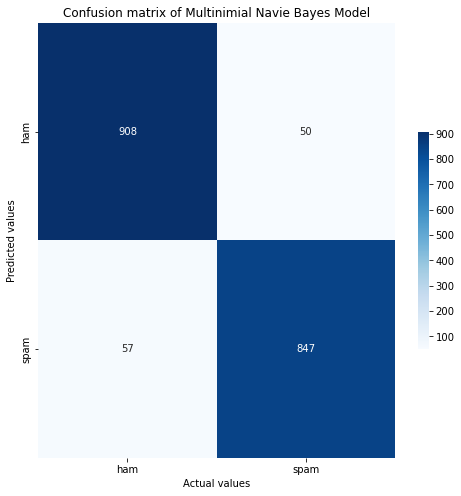

In [35]:
plt.figure(figsize=(8,8))
axis_labels= ['ham','spam']

g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g',cbar_kws={'shrink':0.5},cmap='Blues')
p=plt.title('Confusion matrix of Multinimial Navie Bayes Model')
p=plt.xlabel('Actual values')
p=plt.ylabel('Predicted values')

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv1= cross_val_score(dt,x,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.979
0.004


In [37]:
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)

In [38]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       958
           1       0.97      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [39]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[926,  32],
       [  3, 901]], dtype=int64)

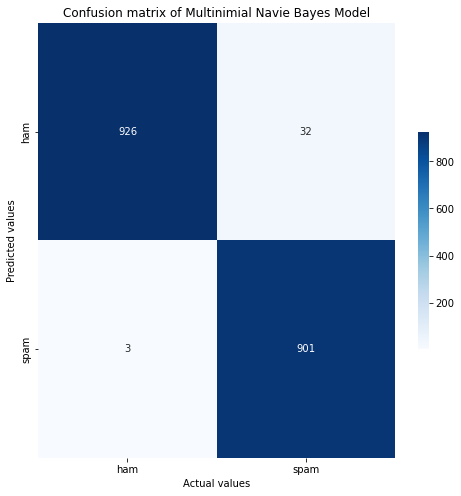

In [40]:
plt.figure(figsize=(8,8))
axis_labels= ['ham','spam']

g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g',cbar_kws={'shrink':0.5},cmap='Blues')
p=plt.title('Confusion matrix of Multinimial Navie Bayes Model')
p=plt.xlabel('Actual values')
p=plt.ylabel('Predicted values')

In [41]:
def predict_spam(sms):
    message=re.sub(pattern='[^a-zA-Z]', repl=' ',string=sms) # filtering out special characters and numbers
    message=message.lower()
    words=message.split() # Tokenizer
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lemm_words)
    temp=tfidf.transform([message]).toarray()
    return mnb.predict(temp)

In [42]:
# Prediction 1 
sample_message=' Get a Job you want.Top companies are hiring in your location.Click here to Apply and earn Daily $50.'
if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message')
else:
    print('This is a Ham(Normal) message')

This is a Ham(Normal) message


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [43]:
# Prediction 2
sample_message='Came to think it. I have never got a spam message before '
if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message')
else:
    print('This is a Ham(Normal) message')

This is a Ham(Normal) message


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
